
# Linear Models

From this notebook, we will implement a simple linear models with hand coded gradient descent
we will try to play with the learning rate and see how it affects the convergence of the model
we will explore what early stop methods could help you
last but not the least, we will implement a simple linear model with Stochastic gradient descent


### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LR import LinearModels
# import make_regression from sklearn.datasets
from sklearn.datasets import make_regression
import pandas as pd
import time

## Part 1.1: Task the gradient desecent algorthim that you wrote

In [2]:

# Generate a synthetic dataset for regression
X, y = make_regression(n_samples=10000, n_features=100, noise=30, random_state=42)

# Reshape y to be a 1D array
y = y.reshape(-1)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]


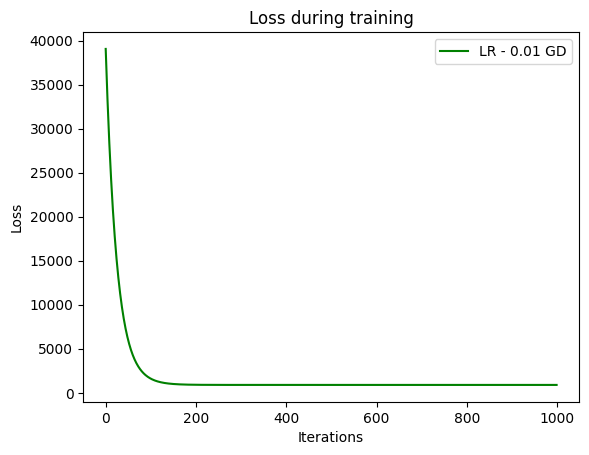

In [9]:
model_1 = LinearModels(learning_rate=0.01, n_iterations=1000)
model_1.train(X_train, y_train)
plt.plot(model_1.log['iterations'], model_1.log['error'], label='LR - 0.01 GD', color='green')
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()


#### If you saw a nice convergence, then congratulations! You have implemented a simple linear regression model using gradient descent.

## Part 1.2 Play with different learning rates

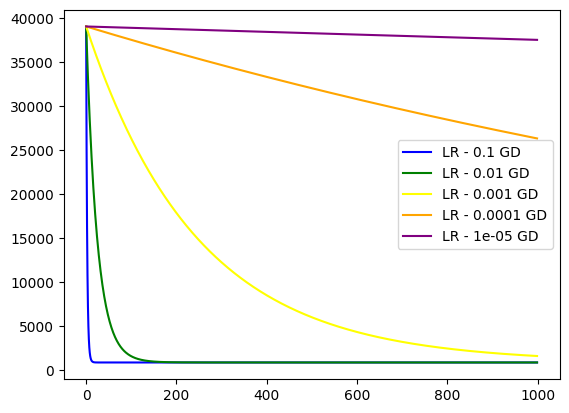

In [15]:
#### create and train a series of models with different learning rates
#### learning rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
colors = ['blue', 'green', 'yellow', 'orange', 'purple']
for i, lr in enumerate(learning_rates):
    model = LinearModels(learning_rate=lr, n_iterations=1000)
    model.train(X_train, y_train)
    plt.plot(model.log['iterations'], model.log['error'], label=f'LR - {lr} GD', color=colors[i])

plt.legend()


#### What do you observe? What is the best learning rate for this dataset?
#### Why it will looks like this?

### Part 1.3: Does the highest learning rate always converge the fastest?

In [23]:
### Set the learning rate to 1, 0.5, 0.2, 0.1, 0.01, 0.001,
### We omit the learning rate of 0.0001 and 0.00001 because they are too small, the model will not converge that fast

learning_rates = [1,  0.1, 0.01, 0.001]
colors = ['blue', 'green', 'yellow', 'orange',]
ylim = 0
df = []
for i, lr in enumerate(learning_rates):
    model = LinearModels(learning_rate=lr, n_iterations=1000)
    model.train(X_train, y_train)
    ylim = max(ylim, model.log['error'][0])
    df.append(model.log['error'])

df = np.array(df)
df = pd.DataFrame(df.T, columns=[f'LR - {lr}' for lr in learning_rates])



/Users/ssun2/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/ssun2/Documents/AICD3/Harry_workspace/Week3/LM_train/LR.py:49: RuntimeWarning: overflow encountered in square
  mse = np.mean(errors**2)  # Mean squared error


(4, 1000)


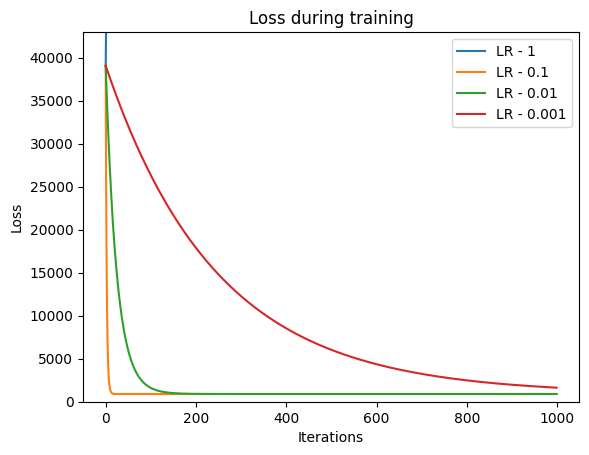

In [33]:
#### set the cale as ylim + 10% of ylim
scale = ylim + 0.1 * ylim
#### plot the error of the models within the same plot
df.plot(ylim=(0, scale))
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()

Text(0.5, 1.0, 'Loss during training')

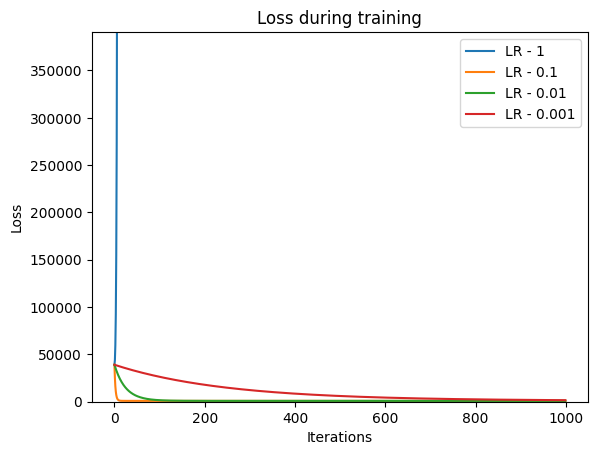

In [34]:
#### Emmmmm that's weird, the model with learning rate of 1 is not converging, let's try to plot the error of the model with a bigger ylim scale
scale = ylim*10
df.plot(ylim=(0, scale))
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")

#### Haha the model with learning rate of 1 is diverging! It increases the error in a very very fast way

#### you would think that's already really bad, but it's not
#### Let's try the whole scale 

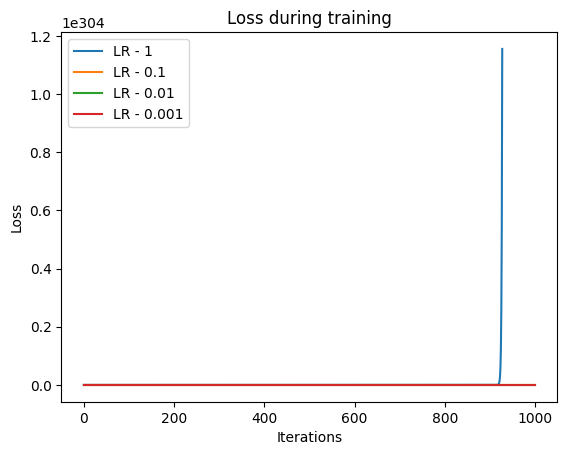

In [31]:
df.plot()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()

#### Actually the model with learning rate of 1 is diverging only expoentially after 900 iterations, let's plot the error of the model with a bigger ylim scale


#### This will look even more interesting if we test it with learning rate 1000, 100, 10, 1
#### Just see how bad it could be


/Users/ssun2/Documents/AICD3/Harry_workspace/Week3/LM_train/LR.py:49: RuntimeWarning: overflow encountered in square
  mse = np.mean(errors**2)  # Mean squared error
/Users/ssun2/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/ssun2/Documents/AICD3/Harry_workspace/Week3/LM_train/LR.py:50: RuntimeWarning: overflow encountered in multiply
  gradients = 2 * np.dot(X.T, errors) / len(X)


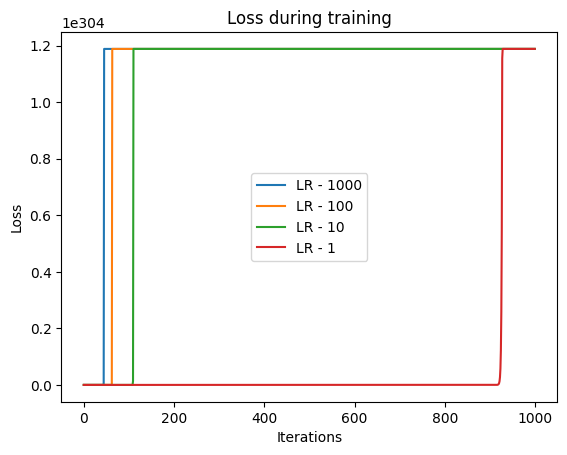

In [45]:
learning_rates =[ 1000, 100, 10, 1]
colors = ['blue', 'green', 'yellow', 'orange']
ylim = 0
df = []
for i, lr in enumerate(learning_rates):
    model = LinearModels(learning_rate=lr, n_iterations=1000)
    model.train(X_train, y_train)
    ylim = max(ylim, model.log['error'][0])
    df.append(model.log['error'])

df = np.array(df)
df = pd.DataFrame(df.T, columns=[f'LR - {lr}' for lr in learning_rates])
# for visualization purpose, we replace the first inf in this dataframe with the maximum value of the dataframe that is not inf
# first we replace the inf with nan
df = df.replace([np.inf], np.nan)
# then we replace the nan with the maximum value of the dataframe that is not nan
max_value = df.max().max()
df = df.fillna(max_value)
# plot it again
df.plot()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()

##### What you found here?

## Part 2.1 LEt's try Stochastic Gradient Descent

100%|██████████| 1000/1000 [00:02<00:00, 368.24it/s]


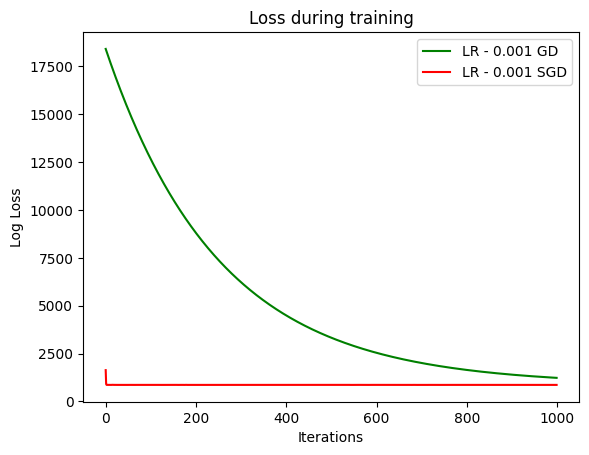

In [2]:
X, y = make_regression(n_samples=1000, n_features=10, noise=30, random_state=42)
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]
# set lr as 0.001
# set n_iterations as 1000
# set method as 'stochastic' or just simple gradient descent
model_gd = LinearModels(learning_rate=0.001, n_iterations=1000)
std_time_gd = time.time()
model_gd.train(X_train, y_train)
end_time_gd = time.time()   
plt.plot(model_gd.log['iterations'], model_gd.log['error'], label='LR - 0.001 GD', color='green')

model_sgd = LinearModels(learning_rate=0.001, n_iterations=1000)
std_time_sgd = time.time()
model_sgd.train_SGD(X_train, y_train)
end_time_sgd = time.time()
plt.plot(model_sgd.log['iterations'], model_sgd.log['error'], label='LR - 0.001 SGD', color='red')
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()



In [3]:
#### Btw which is faster, let's compare the time it takes to train the model using gradient descent and stochastic gradient descent
print(f"Time taken to train the model using gradient descent: {end_time_gd - std_time_gd}")
print(f"Time taken to train the model using stochastic gradient descent: {end_time_sgd - std_time_sgd}")
print(f"How many times faster is the stochastic gradient descent: {(end_time_gd - std_time_gd) / (end_time_sgd - std_time_sgd)}")

Time taken to train the model using gradient descent: 0.03830409049987793
Time taken to train the model using stochastic gradient descent: 2.7247631549835205
How many times faster is the stochastic gradient descent: 0.01405776881187664


## 2.2 Try early stopping

100%|██████████| 1000/1000 [00:06<00:00, 151.12it/s]


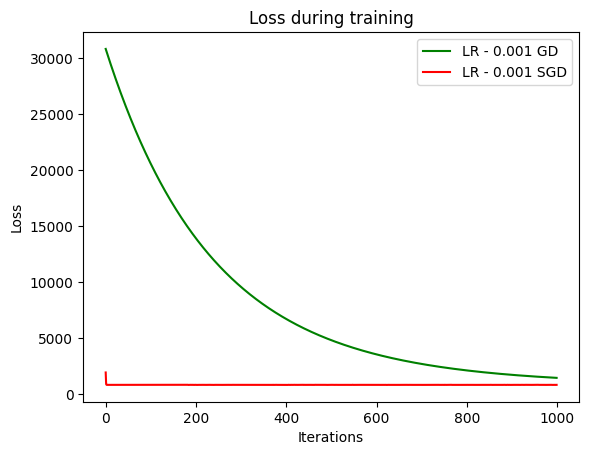

In [19]:
### However is this really true, bascially we should compare the time it takes to converge, let's plot the error of the model during training
### For that earily stop methods work

model_gd = LinearModels(learning_rate=0.001, n_iterations=1000)
time_gd = time.time()
model_gd.train(X_train, y_train, early_stop=True)
end_time_gd = time.time()

model_sgd = LinearModels(learning_rate=0.001, n_iterations=1000)
time_sgd = time.time()
model_sgd.train_SGD(X_train, y_train, early_stop=True)
end_time_sgd = time.time()

plt.plot(model_gd.log['iterations'], model_gd.log['error'], label='LR - 0.001 GD', color='green')
plt.plot(model_sgd.log['iterations'], model_sgd.log['error'], label='LR - 0.001 SGD', color='red')
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss during training")
plt.legend()


In [20]:
### Let's compare the time it takes to train the model using gradient descent and stochastic gradient descent
print(f"Time taken to train the model using gradient descent: {end_time_gd - time_gd}")
print(f"Time taken to train the model using stochastic gradient descent: {end_time_sgd - time_sgd}")
print(f"How many times faster is the stochastic gradient descent: {(end_time_gd - time_gd) / (end_time_sgd - time_sgd)}")

Time taken to train the model using gradient descent: 0.19851994514465332
Time taken to train the model using stochastic gradient descent: 6.636327266693115
How many times faster is the stochastic gradient descent: 0.029914128277096844


### 2.3 Open questions!

100%|██████████| 10000/10000 [01:05<00:00, 153.40it/s]


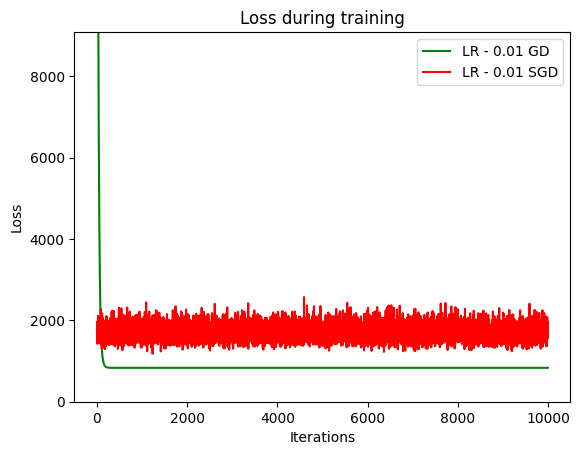

In [21]:
### set lr as 0.01
### set n_iterations as 1000
X, y = make_regression(n_samples=10000, n_features=50, noise=30, random_state=42)
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

model_gd = LinearModels(learning_rate=0.01, n_iterations=10000)
model_gd.train(X_train, y_train)
plt.plot(model_gd.log['iterations'], model_gd.log['error'], label='LR - 0.01 GD', color='green')

model_sgd = LinearModels(learning_rate=0.01, n_iterations=10000)
model_sgd.train_SGD(X_train, y_train)

plt.plot(model_sgd.log['iterations'], model_sgd.log['error'], label='LR - 0.01 SGD', color='red')

plt.ylabel("Loss")
plt.xlabel("Iterations")
ylim = min(model_gd.log['error'][0], model_sgd.log['error'][0])
plt.ylim(0, ylim*5)
plt.title("Loss during training")
plt.legend()

### What's going on?